In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

# Read CSV
data1= os.path.join("raw_data","city_data.csv")
data2= os.path.join("raw_data","ride_data.csv")
data1_df = pd.read_csv(data1)
data2_df = pd.read_csv(data2)



# Average Fare  Per City

In [2]:
#merging both data
data_df = pd.merge(data1_df, data2_df, on="city", how="right")
data_df.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


city_count= data_df["city"].value_counts()
city_count
avg_fare = data_df["fare"].sum(city)

In [3]:
avg_fare = data_df.groupby(["city"]).mean()["fare"].rename("avg").reset_index()
avg_fare.head()


#avg_fare.head()

,city,avg
0,Alvarezhaven,23.928710
1,Alyssaberg,20.609615
2,Anitamouth,37.315556
3,Antoniomouth,23.625000
4,Aprilchester,21.981579


In [4]:
city_type = data_df.groupby(["city","type"]).sum().reset_index()
city_type.drop(['ride_id','fare'], axis=1, inplace=True)
city_type.head()

,city,type,driver_count
0,Alvarezhaven,Urban,651
1,Alyssaberg,Urban,1742
2,Anitamouth,Suburban,144
3,Antoniomouth,Urban,462
4,Aprilchester,Urban,931


In [5]:
total_no_of_ride= data_df["city"].value_counts().rename("no of rides").reset_index()
total_no_of_ride
total_no_of_ride_rename = total_no_of_ride.rename(columns={'index': 'city', 'no of rides': 'number of rides'})
total_no_of_ride_rename.head()

,city,number of rides
0,Port James,64
1,Port Johnstad,34
2,Swansonbury,34
3,South Louis,32
4,Jacobfort,31


In [6]:
merge_df = pd.merge(avg_fare, total_no_of_ride_rename, on="city", how="right")
merge_df.head()

,city,avg,number of rides
0,Alvarezhaven,23.928710,31
1,Alyssaberg,20.609615,26
2,Anitamouth,37.315556,9
3,Antoniomouth,23.625000,22
4,Aprilchester,21.981579,19


In [7]:
total_df = pd.merge(merge_df,city_type, on="city", how="right")
total_df.head()
#total_df.drop('fare', axis=1)

,city,avg,number of rides,type,driver_count
0,Alvarezhaven,23.928710,31,Urban,651
1,Alyssaberg,20.609615,26,Urban,1742
2,Anitamouth,37.315556,9,Suburban,144
3,Antoniomouth,23.625000,22,Urban,462
4,Aprilchester,21.981579,19,Urban,931


In [8]:
#total_df['city'] = pd.to_numeric(total_df['city'])
c={'Urban':'red','Suburban':'blue', 'Rural' : 'yellowgreen'}
suburban_df = total_df.loc[total_df["type"] == "Suburban"]
rural_df = total_df.loc[total_df["type"] == "Rural"]
urban_df = total_df.loc[total_df["type"] == "Urban"]

count_chart1 = suburban_df.plot(kind="scatter", x="number of rides", y="avg", s=suburban_df["number of rides"]*10, marker="o",c="blue", title="Pybar Ride sharing Data(2016)",legend=True,alpha=0.6,edgecolor="black", label= "subarban")
count_chart1 = urban_df.plot(kind="scatter", x="number of rides", y="avg", s=urban_df["number of rides"]*10, marker="o",c="red", title="Pybar Ride sharing Data(2016)",ax=count_chart1,legend=True,alpha=0.6,edgecolor="black",label= "urban")
count_chart1 = rural_df.plot(kind="scatter", x="number of rides", y="avg", s=rural_df["number of rides"]*10, marker="o",c="yellowgreen", title="Pybar Ride sharing Data(2016)",ax=count_chart1,legend=True,alpha=0.6,edgecolor="black",label= "rural")
plt.legend()
legend = plt.legend(loc="upper right", numpoints=1, fontsize=10)
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]
plt.xlabel("total no of rides (per city)")
plt.ylabel("Avg fare($)")
plt.xlim(0, 40)
plt.ylim(15, 45)
plt.gca().set_aspect('equal', adjustable='box')
plt.grid()
data="Notes:circle size correlated with driver count percity"
plt.text(48,35,data)
count_chart1.set_axis_bgcolor("lightgray")



C:\Users\tania\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


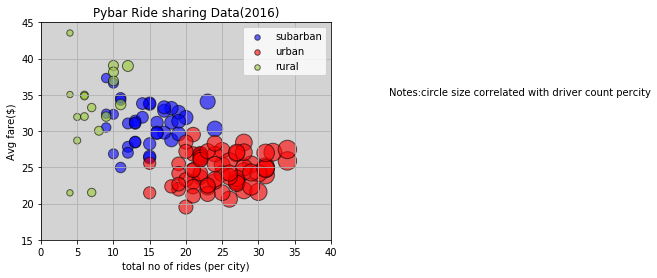

In [9]:
plt.show()

# Extra Pie Plot


In [10]:
from matplotlib import rcParams
rcParams['axes.titlepad'] = 20 
total_df.head()


,city,avg,number of rides,type,driver_count
0,Alvarezhaven,23.928710,31,Urban,651
1,Alyssaberg,20.609615,26,Urban,1742
2,Anitamouth,37.315556,9,Suburban,144
3,Antoniomouth,23.625000,22,Urban,462
4,Aprilchester,21.981579,19,Urban,931


In [11]:
avg_fare_city = total_df.groupby(["type"]).sum().reset_index()
avg_fare_city.head()

,type,avg,number of rides,driver_count
0,Rural,615.728572,125,727
1,Suburban,1268.627391,657,9730
2,Urban,1623.863390,1625,64501


# 1: % of total fare by city type

In [12]:

plt.pie(avg_fare_city['avg'],labels=avg_fare_city['type'], startangle=90,autopct='%1.1f%%',colors = ["yellowgreen", "blue", "coral"],explode=(0, 0, 0.05))
plt.axis("equal")    
plt.title(s="total fare by city type")    
rcParams['axes.titlepad'] = 20 

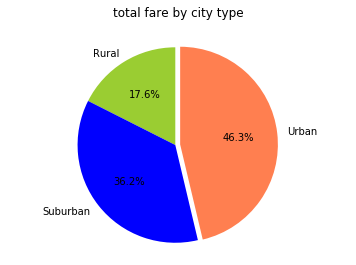

In [13]:
plt.show()

# 2: % of total rides by city type


In [14]:

plt.pie(avg_fare_city['number of rides'],labels=avg_fare_city['type'], startangle=90,autopct='%1.1f%%',colors = ["yellowgreen", "blue", "coral"],explode=(0, 0, 0.05))
plt.axis("equal")  
plt.title(s="% of total rides by city type")   
plt.gca().axis("equal")
rcParams['axes.titlepad'] = 40 

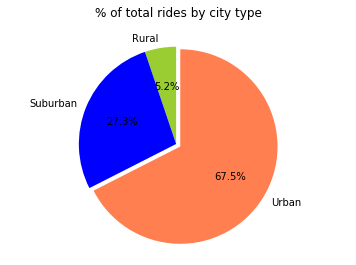

In [15]:
plt.show()

# 3: Total Drivers by City Type

In [16]:

plt.pie(avg_fare_city['driver_count'],labels=avg_fare_city['type'], startangle=135,autopct='%1.1f%%',colors = ["yellowgreen", "blue", "coral"],explode=(0, 0, 0.05))
plt.axis("equal")    
plt.title(s="Total Drivers by City Type")  
plt.gca().axis("equal")
rcParams['axes.titlepad'] = 40 


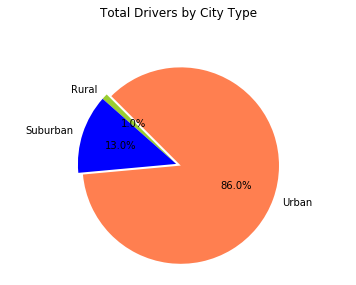

In [17]:
plt.show()